In [36]:
# 6장 복습
# 1. mpg 데이터를 분석하라
# 자동인지 수동인지에 따라서(trans) 
# 도심연비와 고속도로 연비가 얼마나 다른지 확인하라.
# 또한 전륜/후륜/4륜에 따른(drv) cty, hwy 의 평균 연비를 비교해라.
# trans와 drv에 따른 cty와 hwy의 평균 연비를 구하라.
import pandas as pd
mpg = pd.read_csv("/Users/hanminjeong/Desktop/School/2-2/jupyterLab/Data/mpg.csv")
mpg.groupby('trans').agg(고속도로연비평균 = ('hwy', 'mean'),
                         도심연비평균 = ('cty', 'mean'),
                         자동차수 = ('trans', 'count')).sort_values('도심연비평균', ascending=False).query('자동차수 > 10')

mpg.groupby('drv').agg(고속도로연비평균 = ('hwy', 'mean'),
                         도심연비평균 = ('cty', 'mean'),
                         자동차수 = ('trans', 'count')).sort_values('도심연비평균', ascending=False).query('자동차수 > 10')

,고속도로연비평균,도심연비평균,자동차수
drv,,,
f,28.160377,19.971698,106
4,19.174757,14.330097,103
r,21.000000,14.080000,25


In [ ]:
# [trans에 따라서 - 자동/수동]
# 1.1) cty평균연비로 sort해보고, top5를 고르시오.
# 1.2) hwy 평균연비로 sort해보고, top5를 고르시오.

# [drv에 따라서 - 전륜/후륜/4륜]
# 1.1) cty평균연비로 sort해보고, top5를 고르시오.
# 1.2) hwy 평균연비로 sort해보고, top5를 고르시오.


# 2. fl의 종류에 따라서, cty연비의 평균과 
# hwy연비의 평균이 다른지 확인하라.
# 1.1) cty평균연비로 sort해보고, top5를 고르시오.
# 1.2) hwy 평균연비로 sort해보고, top5를 고르시오.

In [32]:
import numpy as np
import pandas as pd
# 결측치가 들어있는 데이터 프레임 만들기
# NaN : Not a Number 숫자 형태의 누락된 데이터
df = pd.DataFrame( {'gender' : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]} )
                
df

,gender,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [38]:
df['score']

0    5.0
1    4.0
2    3.0
3    4.0
4    NaN
Name: score, dtype: float64

In [40]:
# # 1. isna() - NaN?
# 2. dropna() - Nan 지워라
# 3. fillna() 값을 변경

# 1) dataframe
df.isna().sum()
# 2) pandas에게 물어봄
pd.isna(df).sum()

gender    1
score     1
dtype: int64

In [42]:
df.dropna(subset=['score', 'gender'])
# df.dropna()

,gender,score
0,M,5.0
1,F,4.0
3,M,4.0


In [50]:
# fillna()
df['gender'] = df['gender'].fillna("M")
df

,gender,score
0,M,5.0
1,F,4.0
2,M,3.0
3,M,4.0
4,F,NaN


In [52]:
df['score'] = df['score'].fillna("5.0")
df

,gender,score
0,M,5.0
1,F,4.0
2,M,3.0
3,M,4.0
4,F,5.0


In [60]:
# 이상치를 갖는 데이터 만들기
# class (1, 2, 3반이 있음)
# score (1 ~ 5점) 5점 척도로 분류
# 이상치 : class - 4, score - 6
df = pd.DataFrame({'class' : [1, 2, 4, 3, 4, 1],
                   'score' : [5, 4, 3, 4, 2, 6]
                  })
df['class'].unique()
df['class'].value_counts()

# 4 => np.nan 로 변경
df['class'] = np.where(df['class'] == 4, np.nan, df['class'])

# score > 5 이면 nnp.nan으로 변경해라
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,class,score
0,1.0,5.0
1,2.0,4.0
2,NaN,3.0
3,3.0,4.0
4,NaN,2.0
5,1.0,NaN


In [74]:
df.isna().sum()
df['class'] = df['class'].fillna(3)
df['score'] = df['score'].fillna(5)
df

,class,score
0,1.0,5.0
1,2.0,4.0
2,3.0,3.0
3,3.0,4.0
4,3.0,2.0
5,1.0,5.0


27.0

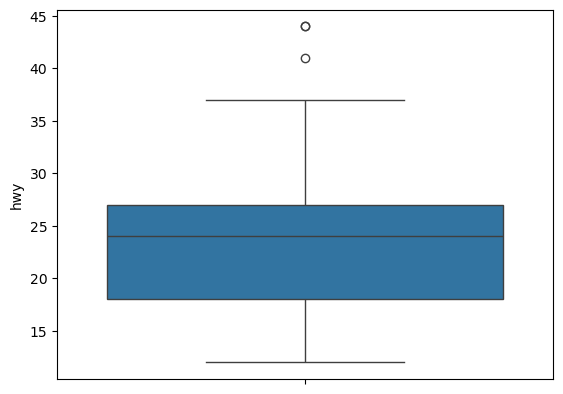

In [84]:
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')
mpg['hwy'].describe()
mpg['hwy'].quantile(0.25) # 18
mpg['hwy'].quantile(0.75) # 27

In [ ]:
몸통사이즈 = 9
정상범위_최소 = 4.5  # 18 - 9 * 1.5
정상범위_최대 = 40.5 # 27 + 9 * 1.5

In [128]:
# 1. 비정상인 것을 찾아라
mpg.query('hwy < 4.5 | hwy > 40.5')
# 2. 비정상인 것을 np.nan으로 바꿔라
mpg['hwy'] = np.where(mpg['hwy'] < 4.5, np.nan, mpg['hwy']) # 4.5 미만
mpg['hwy'] = np.where(mpg['hwy'] > 40.5, np.nan, mpg['hwy']) # 40.5 초과
# mpg.query('hwy < 4.5 | hwy > 40.5')
# 3. np.nan 이 몇 개인지 찾아라
mpg['hwy'].isna().sum()
# 4. np.nan을 30으로 바꿔라
mpg['hwy']= mpg['hwy'].fillna(30)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29.0,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26.0,p,midsize
